#### Prérequis

In [1]:
!git clone https://github.com/ljpetkovic/kraken_Toolbox

Cloning into 'kraken_Toolbox'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 66 (delta 0), reused 1 (delta 0), pack-reused 63
Unpacking objects: 100% (66/66), done.


In [ ]:
!git pull

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 1), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ljpetkovic/kraken_Toolbox
   495d17a..4a90815  main       -> origin/main
Updating 495d17a..4a90815
Fast-forward
 material/OCR17.mlmodel | Bin 0 -> 2981190 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100755 material/OCR17.mlmodel


## Installer et importer la librairie

In [2]:
!pip install kraken
import kraken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 8.6 MB/s 
     |████████████████████████████████| 1.6 MB 45.7 MB/s 
     |████████████████████████████████| 584 kB 49.7 MB/s 
     |████████████████████████████████| 96 kB 8.0 MB/s 
     |████████████████████████████████| 232 kB 62.7 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 409 kB 62.3 MB/s 
     |████████████████████████████████| 140 kB 59.9 MB/s 
     |████████████████████████████████| 1.1 MB 49.1 MB/s 
     |████████████████████████████████| 271 kB 59.1 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 62.3 MB/s 
     |████████████████████████████████| 51 kB 9.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Att

#### Se déplacer dans le dossier `kraken_Toolbox`

In [3]:
%cd kraken_Toolbox

/content/kraken_Toolbox


## Binariser les images

In [ ]:
!kraken -I img/M1119_03_R416_005r.jpg -o .png binarize

Binarizing	✓


#### Créer les dossier `bin` et `seg` où nous allons stocker les images binarisées, ainsi que leurs coordonnées, respectivement.


In [ ]:
!mkdir img/bin
!mkdir img/seg
!mkdir img/results

mkdir: cannot create directory ‘img/bin’: File exists
mkdir: cannot create directory ‘img/seg’: File exists
mkdir: cannot create directory ‘img/results’: File exists


##### Déplacer les images binarisées `.jpg` dans le dossier `bin`

In [ ]:
!mv img/*.png img/bin

## Binariser + segmenter les images

In [ ]:
!kraken -I img/M1119_03_R416_005r.jpg -o .json binarize segment

Binarizing	✓
Segmenting	✓


#### Déplacer les segmentations `.json` dans le dossier `seg`

In [ ]:
!mv img/*.json img/seg/

#### Voir la segmentation de l'image

In [ ]:
!cat img/seg/M1119_03_R416_005r.json

{"text_direction": "horizontal-lr", "boxes": [[573, 144, 2520, 347], [767, 319, 2468, 442], [2552, 0, 2809, 122], [1114, 507, 2103, 621], [564, 594, 2824, 723], [562, 715, 2840, 823], [559, 815, 2635, 907], [491, 907, 2752, 1023], [553, 1012, 2821, 1128], [550, 1117, 2809, 1233], [1082, 1218, 2043, 1314], [48, 1288, 2840, 1411], [4, 1395, 2836, 1521], [32, 1486, 2381, 1619], [1180, 1597, 1648, 1693], [438, 1687, 2781, 1811], [2217, 1781, 2521, 1851], [537, 1796, 1522, 1915], [1249, 1856, 1684, 1984], [535, 1948, 2802, 2109], [534, 2072, 1497, 2207], [1432, 2152, 1781, 2283], [531, 2272, 2613, 2417], [529, 2384, 2389, 2521], [54, 2564, 2652, 2691], [36, 2677, 2816, 2790], [44, 2752, 1713, 2976], [1347, 2876, 1634, 2949], [330, 2964, 2840, 3101], [523, 3077, 2825, 3188], [462, 3174, 938, 3291], [1220, 3251, 1651, 3369], [521, 3352, 2751, 3483], [1265, 3461, 1640, 3565], [519, 3552, 2781, 3682], [525, 3646, 2735, 3777], [939, 3747, 1092, 3830], [1323, 3770, 1669, 3834], [470, 3853, 2682, 

## Binariser + segmenter + transcrire

In [ ]:
!kraken -I img/M1119_03_R416_005r.jpg -o .txt binarize segment -bl ocr -m material/lectaurep_base.mlmodel

Loading ANN /usr/local/lib/python3.7/dist-packages/kraken/blla.mlmodel	✓
Loading ANN default	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 42/42 0:00:00 0:00:24
Writing recognition results for img/M1119_03_R416_005r.jpg	✓


#### Déplacer les transcriptions `.txt` dans le dossier `results`

In [ ]:
!mv img/*.txt img/results/

## Binariser + segmenter + transcrire **par lots**

In [ ]:
!kraken -I 'img/impr/*.jpg' -o .txt binarize segment ocr -m material/OCR17.mlmodel.mlmodel

Loading ANN default	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 22/22 0:00:00 0:00:11
Writing recognition results for img/M1119_03_R416_006v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 17/17 0:00:00 0:00:11
Writing recognition results for img/M1119_03_R416_007r.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 37/37 0:00:00 0:00:26
Writing recognition results for img/M1119_03_R416_008v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 45/45 0:00:00 0:00:23
Writing recognition results for img/M1119_03_R416_011r.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 48/48 0:00:00 0:00:22
Writing recognition results for img/M1119_03_R416_010v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 54/54 0:00:00 0:00:20
Writing recognition results for img/M1119_0

#### Déplacer les transcriptions `.txt` dans le dossier `results`

In [ ]:
!mv img/*.txt img/results/

## Entraîner le modèle

### Création des données d'entraînement (vérité-terrain, angl. _ground truth_)

##### Génération de l'interface de transcription

In [ ]:
!ketos transcribe -o ./material/test.html ./img/M1119_03_R416_005r.jpg 

Reading images ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1/1 0:00:00 0:00:55
Writing output ✓


#### Télécharger le fichier HTML de l'interface de transcription

In [ ]:
from google.colab import files
files.download('material/test.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⚠️ **BUG** 
#####  Pré-remplir l'interface de transcription pour accélérer la création de vérité-terrain
* Les lignes transcrites d'HTML `<li>` ne s'affichent pas dans le navigateur<br>
* Par contre, elles sont bien extraites lors de l'extraction des lignes pour la création de VT. 

⚠️ **SEGMENTATION** 
* La segmentation n'est pas correcte (p. ex. le texte de la marge n'est pas isolé du texte de la ligne) 
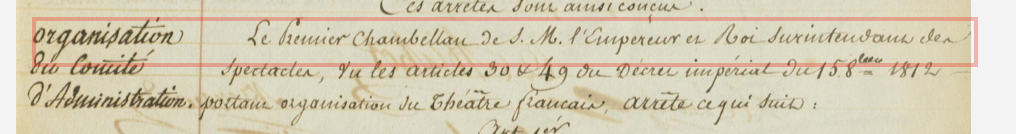

_idem_ pour les imprimés :

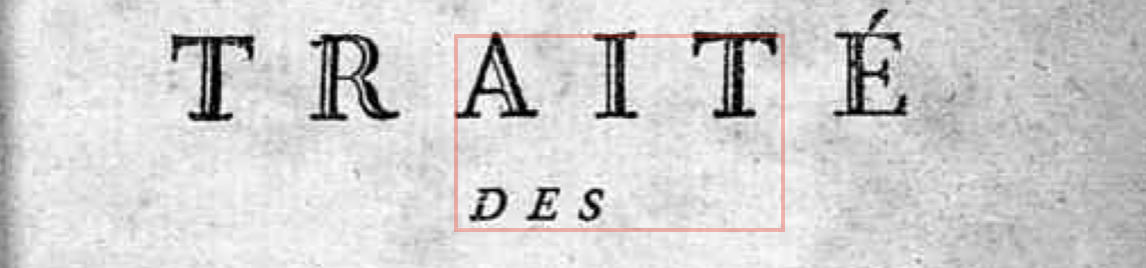

* recommandation : passer à _eScriptorium_ !

In [ ]:
!ketos transcribe -o material/test_prefill.html --prefill material/OCR17.mlmodel img/impr/*.jpeg

Loading ANN✓
Reading images ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 11/11 0:00:00 0:08:05
Writing output ✓


In [ ]:
from google.colab import files
files.download('material/test_prefill.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Le traitement (océrisation) par lots (angl. _batch processing_)

In [ ]:
!kraken -I "./img/*.jpg" -o .txt binarize segment ocr -m ./material/lectaurep_base.mlmodel

Loading ANN default	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 22/22 0:00:00 0:00:12
Writing recognition results for ./img/M1119_03_R416_006v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 17/17 0:00:00 0:00:12
Writing recognition results for ./img/M1119_03_R416_007r.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 37/37 0:00:00 0:00:28
Writing recognition results for ./img/M1119_03_R416_008v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 45/45 0:00:00 0:00:24
Writing recognition results for ./img/M1119_03_R416_011r.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 48/48 0:00:00 0:00:24
Writing recognition results for ./img/M1119_03_R416_010v.jpg	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 54/54 0:00:00 0:00:24
Writing recognition results for .

## Déplacer les transcriptions `.txt` dans le dossier `results`

In [ ]:
!mv ./img/*.txt ./results

## _Fine-tuner_ le modèle

In [6]:
!ketos transcribe --prefill ./material/lectaurep_base.mlmodel -o ./material/test_prefill_cont.html ./img/mss/*.jpg

Loading ANN✓
Reading images ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 10/10 0:00:00 0:10:34
Writing output ✓


In [ ]:
!ketos transcribe -o ./material/test_prefill.html --prefill ./material/riant_ftmrs15_12.mlmodel ./img/M1119_03_R416_005r.jpg

Loading ANN✓
Reading images ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1/1 0:00:00 0:01:16
Writing output ✓


#### Extraire les données pour entraîner l'OCR

In [4]:
!ketos extract --output gt/ ./material/test_prefill.html

Reading transcriptions ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1/1 0:00:00 0:01:19


#### Télécharger le script de Jean-Baptiste Camps (ENC) qui permet la création des jeux de données (`train`, `val` et `test`)

In [7]:
!curl https://raw.githubusercontent.com/gabays/DistRead_1/master/DistRead_1_4/material/randomise_data.py --output ./material/randomise_data.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   485  100   485    0     0   2146      0 --:--:-- --:--:-- --:--:--  2146


In [8]:
!python ./material/randomise_data.py ./gt/*.png

#### Entraîner le modèle

In [9]:
!ketos train -u NFD -t ./train.txt -e ./val.txt

[05/30/22 12:14:31] WARNING  alphabet mismatch: chars in training   ]8;id=357250;file:///usr/local/lib/python3.7/dist-packages/kraken/lib/train.py\train.py]8;;\:]8;id=304848;file:///usr/local/lib/python3.7/dist-packages/kraken/lib/train.py#304\304]8;;\
                             set only: {'M', 'E', 'L', 'œ', 'f',                
                             'A', '.', 'd', '8', 'S', '-', 'j',                 
                             'v', 'F', 'g', 'P', '̂'} (not included              
                             in accuracy test during training)                  
                    WARNING  alphabet mismatch: chars in validation ]8;id=545314;file:///usr/local/lib/python3.7/dist-packages/kraken/lib/train.py\train.py]8;;\:]8;id=341481;file:///usr/local/lib/python3.7/dist-packages/kraken/lib/train.py#308\308]8;;\
                             set only: {'9', ':'} (not trained)                 
Trainer already configured with model summary callbacks: [<class 'pytorc

#### Sauvegarder le meilleur modèle et effacer les autres

In [10]:
!cp ./model_best.mlmodel ./material/monModele.model
!rm -f ./*.mlmodel

#### Pour _fine tuner_ le modèle existant

In [30]:
 # On fait une sauvegarde
!cp ./material/OCR17.mlmodel ./material/OCR17.mlmodel.bk
#On entraine le modèle
!ketos train -i ./material/OCR17.mlmodel --resize add ./gt/*.png
#On saveugarde le nouveau modèle
!cp ./model_best.mlmodel ./material/monModeleFineTune.model
!rm -f ./*.mlmodel

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
┏━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name     ┃ Type                     ┃ Params ┃
┡━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ net      │ MultiParamSequential     │  745 K │
│ 1  │ net.C_0  │ ActConv2D                │    320 │
│ 2  │ net.Do_1 │ Dropout                  │      0 │
│ 3  │ net.Mp_2 │ MaxPool                  │      0 │
│ 4  │ net.C_3  │ ActConv2D                │ 18.5 K │
│ 5  │ net.Do_4 │ Dropout                  │      0 │
│ 6  │ net.Mp_5 │ MaxPool                  │      0 │
│ 7  │ net.S_6  │ Re

In [31]:
!ketos test -m ./material/monModeleFineTune.model -e ./test.txt >./eval_model.txt
#J'affiche le résultat du test
!cat eval_model.txt

Loading model ./material/monModeleFineTune.model	✓
Evaluating ./material/monModeleFineTune.model
Evaluating ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 2/2 0:00:00 0:00:00
=== report  ===

36	Characters
3	Errors
91.67%	Accuracy

3	Insertions
0	Deletions
0	Substitutions

Count	Missed	%Right
4	0	100.00%	Common
32	3	90.62%	Latin

Errors	Correct-Generated
1	{ D } - {  }
1	{ E } - {  }
1	{ S } - {  }

Average accuracy: 91.67%, (stddev: 0.00)


#### Océriser un texte avec un nouveau modèle



In [33]:
!kraken -i ./img/mss/test/test.jpg ./results/ocr_result_nouveauModele.txt binarize segment ocr -m ./material/monModeleFineTune.model

Loading ANN default	✓
Binarizing	✓
Segmenting	✓
Processing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 15/15 0:00:00 0:00:05
Writing recognition results for ./img/mss/test/test.jpg	✓


#### Si export `hOCR`

In [34]:
!kraken -i ./img/mss/test/test.jpg ./results/ocr_result_monModele.html binarize segment ocr -h -m ./material/monModeleFineTune.model

Usage: kraken ocr [OPTIONS]
Try 'kraken ocr --help' for help.

Error: No such option: -h


#### Si export `ALTO`

In [35]:
!kraken -i ./img/mss/test/test.jpg ./results/ocr_result_monModele.xml binarize segment ocr -a -m ./material/monModeleFineTune.model
# files.download('/content/results/ocr_result_nouveauModele.xml')

Usage: kraken ocr [OPTIONS]
Try 'kraken ocr --help' for help.

Error: No such option: -a
